<a href="https://colab.research.google.com/github/jugernaut/Induccion_MeIA/blob/angel/3_IntroduccionIA/03_MiPrimerRedNeuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h2 align="center"><i>Mi Primer Red Neuronal</i></h2>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M. en C. Miguel Angel Pérez León.</i></h5>
  <h5 align="center"><i>correo: zeus@ciencias.unam.mx</i></h5>
</font>

## Introducción

*TensorFlow* es una *API* desarrollada por *Google* y es el conjunto de herramientas libres que se utiliza más ampliamente en el desarrollo de inteligencia artificial. Se usa en los asistentes virtuales de *Google* e incluso en sus buscadores.

Existen múltiples versiones de *TensorFlow*, sin embargo en esencia vamos a contar con la versión 1.x y la versión 2.x. La principal diferencia entre ambas es que la versión 1.x hace uso de **grafos** para representar el flujo de los datos y la versión 2.x se apoya en [Keras](https://enmilocalfunciona.io/deep-learning-basico-con-keras-parte-1/) para generar modelos más intuitivos.

En este documento nos enfocaremos en la versión 2.x de *TensorFlow* con soporte para *GPU's* (unidad de procesamiento gráfico) y antes que otra cosa, vamos a validar el acceso a la *GPU*.

In [ ]:
import tensorflow as tf

print(tf.test.is_gpu_available())
print(tf.config.list_physical_devices('GPU'))
print(tf.__version__)

## Red Neuronal al instante

Vamos a 'construir' una red neuronal en un par de celdas mediante *TensorFlow*, el código e imágenes mostradas a continuación se toman del [manual oficial](https://www.tensorflow.org/tutorials/keras/classification?hl=es-419) de *TensorFlow*.

En este ejemplo vamos a mostrar y entrenar una red neuronal que pueda clasificar imágenes de prendas.

<table>
  <tr><td>
    <img src="https://github.com/jugernaut/ProgramacionEnParalelo/blob/main/Imagenes/Envoltorios/fashion-mnist-sprite.png?raw=true" width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

### *MNIST*

Dado que esta red neuronal clasifica imágenes de ropa, necesitamos una **base de datos** grande de estas imágenes.

*MNIST* es una base de datos accesible mediante la red y con una gran cantidad de datos para entrenar nuestras redes neuronales.

Así que el primer paso es cargar esta base de datos en la sesión actual de MACTI, esto se realiza en la siguiente celda.

In [ ]:
# TensorFlow y tf.keras
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Al ejecutar la celda anterior vamos a tener en memoria cuatro arreglos en *NumPy* (biblioteca de cálculos numéricos):

* Los arreglos *train_images* y *train_labels* conforman el *training set* y que usa el modelo de datos para aprender/entrenar.
* El modelo es probado contra los arreglos *test_images*, y *test_labels* que conforman el *test set*.

Las imágenes son arreglos de *NumPy* (matrices) de $28\times28$, con valores en cada entrada (pixeles) que varian de 0 a 255. Los *labels* es un arreglo de enteros, que van del 0 al 9. Estos corresponden a la *class* de ropa que la imagen representa.

<center>
<table>
  <tr>
    <th>Etiqueta</th>
    <th>Clase</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Playera/blusa</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trusa</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Vestido</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Abrigo</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandalia</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Camisa</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bolsa</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Bota al tobillo</td>
  </tr>
</table>
</center>

Dado que los nombres de las clases (Class name) no vienen incluidos en la información que recién descargamos, es necesario almacenarlos en una variable de *Python*.

In [ ]:
class_names = ['Camiseta/Blusa', 'Trusa', 'Pullover', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Sneaker', 'Bolsa', 'Bota al tobillo']

#### Contenido del *data set*

El contenido del set de datos antes de entrenar el modelo es el siguiente, hay 60,000 imágenes en el set de entrenamiento, con cada imagen representada por mapas de bits (matrices) de $28\times28$:

In [ ]:
train_images.shape

Se cuenta con 60,000 etiquetas para el entrenamiento.

In [ ]:
len(train_labels)

Cada etiqueta es un entero entre $0-9$

In [ ]:
train_labels

Hay 10,000 imágenes en el set de pruebas. Otra vez, cada imagen es representada como arreglos de *numpy* (matrices) de $28\times28$:

In [ ]:
test_images.shape

Finalmente el conjunto de pruebas cuenta con 10,000 etiquetas para el momento de validar la efectividad del modelo.

In [ ]:
len(test_labels)

10000

### Pre-procesando los datos

Es frecuente al hacer uso de imágenes, que estas requieran un "pre-procesamiento" antes de ser utilizadas por el modelo.

Veamos la primer imagen del conjunto de imágenes y comprobemos que son imágenes de $28\times28$ pixeles y cada pixel toma un valor en el rango entre $0-255$.

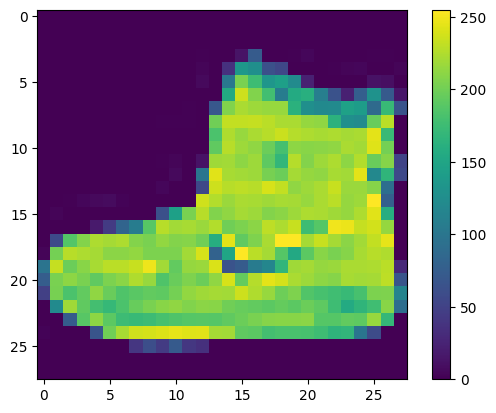

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Es necesario escalar los valores de las imágenes en un rango de $0$ a $1$ antes de usarlos en el modelo de la red neuronal. Para hacerlo, es necesario dividir los valores por $255$, para **pasar las imágenes a escala de grises**. Es importante que el *training set* y el *testing set* se pre-procesen de la misma forma:

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imágenes de el *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

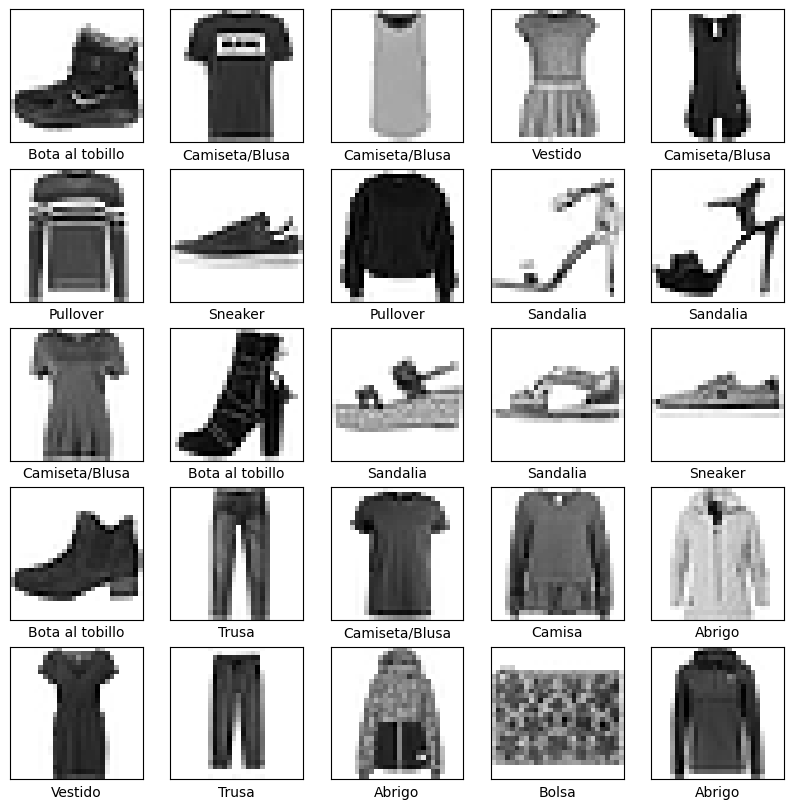

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Construir el modelo

El modelo de esta red neuronal es un modelo por capas como el que podemos ver en la siguiente imagen.

<center>
<img src="https://github.com/jugernaut/ProgramacionEnParalelo/blob/main/Imagenes/Envoltorios/reco_ropa.png?raw=true" width="700">
</center>

Existe todo un marco teórico detras de la construcción de este modelo y para mayor detalle se invita a revisar las referencias. En esta sección vamos a mostrar el código necesario y una breve explicación del mismo.

En la siguiente celda se genera el modelo.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

La primera capa de esta red, `tf.keras.layers.Flatten`, 
transforma el formato de las imágenes de un arreglo bi-dimensional (de $28\times28$ pixeles) a un arreglo uni dimensional (de 28 por 28 pixeles = 784 pixeles). Observe esta capa como una capa no apilada de filas de pixeles, pensemos que la imagen que "aplana" (*flatten*) en una sola fila. Esta capa no tiene parametros que aprender; solo reformatea el set de datos.

Después de que los pixeles estan "aplanados", la secuencia consiste de dos capas`tf.keras.layers.Dense`. Ambas capas estan densamente conectadas, o completamente conectadas. La primera capa `Dense` tiene 128 nodos (o neuronas). La segunda (y última) capa es una capa de 10 nodos *softmax* que devuelve un arreglo de 10 probabilidades que suman 1. Cada nodo contiene una clasificación que indica la probabilidad que la actual imagen pertenezca a una de las 10 clases.

Otro de los parámetros que reciben las capas son las **funciones de activación** (*relu* y *softmax*). Estas funciones de activación son elementos fundamentales en el diseño de una red neuronal. 

### Compilando el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones más. Estas son agregadas durante el paso de compilación del modelo:

* *Loss function*: También conocida como **función de costos**, mide que tan exacto es el modelo durante el entrenamiento. **La idea es minimizar esta funcion** para dirigir el modelo en la direccion adecuada.
* *Optimizer*: Mediante el optimizador es como el modelo se actualiza basado en el set de datos que ve y la evaluación de la función de costos. Uno de los optimizadores que se usan de manera más frecuente es el **descenso del gradiente**.
* *Metrics*: Se usan para monitorear los pasos de entrenamiento y de pruebas.

El siguiente ejemplo usa *accuracy* (exactitud), es decir la fracción de la imágenes que son correctamente clasificadas.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Entrenar el modelo

Entrenar el modelo de red neuronal requiere de los siguientes pasos:

1. Mostrar los datos de entrenamiento al modelo. En este ejemplo , el set de datos de entrenamiento esta en los arreglos `train_images` y `train_labels`.
2. El modelo aprende a asociar imágenes a etiquetas.
3. Se le pide al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo, incluido en el arreglo `test_images`. Resta verificar que las predicciones sean iguales a las etiquetas de el arreglo`test_labels`.

Para comenzar a entrenar, usamos el método `model.fit`, es llamado asi por que *fit* (ajusta) el modelo a el set de datos de entrenamiento:

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 2ms/step - loss: 0.4974 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3774 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3377 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3135 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2942 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2790 - accuracy: 0.8982
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2663 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2569 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2457 - accuracy: 0.9086
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.23

### Interpretando imágenes

Se le muestra un conjunto de imágenes al modelo `test_images` y el modelo nos devuelve un una lista `predicción` que nos indica que es lo que interpreta el modelo de la imagen en cada una de sus entradas.

In [ ]:
predicciones = model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [ ]:
# FUNCIONES AUXILIARES PARA GRAFICAR
# Grafica una imagen y su respectiva prediccion por el modelo
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Muestra la probabilidad que indica el modelo de cada prenda de ropa
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Veamos que interpretación le da el modelo a la imagen 0

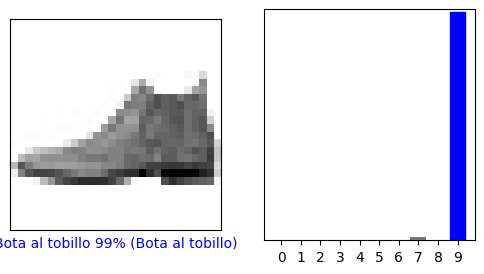

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predicciones[i],  test_labels)
plt.show()

Y veamos ahora que sucede con la imagen 17 (intentalo con diferentes prendas)

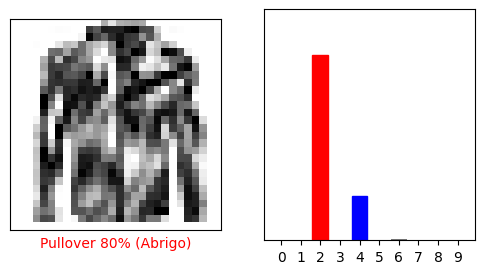

In [ ]:
i = 17
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predicciones[i],  test_labels)
plt.show()

# Conclusiones

Podemos decir muchas cosas al respecto, una de ellas es, ¿en qué más (además de identificar prendas) puedo usar esta magia oscura? y la respuesta es muy sencilla, **todo aquello que pueda ser mapeado (asociado) a un vector o matriz** puede ser procesado por una red neuronal artificial:
- Predicción en la bolsa de valores.
- Diagnósticos médicos.
- Estimación de seguros.
- Modelos de lenguaje natural (ChatGPT)
- Creación de imágenes o audio (*midjourney, Dall-e*)

Lo siguiente sería preguntarse: **¿cómo diablos funciona esta cosa maravillosa?**, ya que hasta el momento solo la usamos pero en realidad no sabes cómo es que logra hacer lo que hace.

Bueno, la respuesta corta es **MATEMÁTICAS, ESTADÍSTICA, PROGRAMACIÓN** y muchas otras cosillas que podemos englobar con el término **Inteligencia Artificial**.

Para conocer estas respuestas, es necesario ver la siguiente temporada de este apasionante curso de aprendizaje de máquina.

## Referencias

*   https://www.tensorflow.org/tutorials/keras/classification?hl=es-419
*   http://www.saedsayad.com/clustering_som.htm
*   https://www.tensorflow.org/install
*   https://codesachin.wordpress.com/2015/11/28/self-organizing-maps-with-googles-tensorflow/

